<a href="https://colab.research.google.com/github/RELEBOHILE-PHEKO/DataScience/blob/main/GCI_Global.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GCI Global 2025 - Final Assignment: Employee Attrition Prediction
# Student: 25ALU-Relebohile

In [3]:
# 1. SETUP & IMPORTS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
import warnings
warnings.filterwarnings('ignore')

sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
print("Libraries imported successfully.")

Libraries imported successfully.


In [4]:
# 2. LOAD DATA
from google.colab import files
print("Upload your data.csv file:")
uploaded = files.upload()

filename = list(uploaded.keys())[0]
df = pd.read_csv(filename)

print("Data loaded successfully.")
print(f"Dataset Shape: {df.shape[0]} rows × {df.shape[1]} columns")


Upload your data.csv file:


Saving data.csv to data (1).csv
Data loaded successfully.
Dataset Shape: 1470 rows × 44 columns


In [5]:
# 3. INITIAL DATA EXPLORATION
print("Column Names:")
print(df.columns.tolist())

print("First 5 Rows:")
print(df.head())

print("Data Types:")
print(df.dtypes)

print("Missing Values:")
missing = df.isnull().sum()
if missing.sum() > 0:
    print(missing[missing > 0])
else:
    print("No missing values.")

print(f"Duplicate Rows: {df.duplicated().sum()}")

print("Target Variable Distribution:")
print(df['Attrition'].value_counts())
print(f"Attrition Rate: {(df['Attrition'] == 'Yes').sum() / len(df) * 100:.2f}%")

Column Names:
['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'PerformanceIndex', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyAchievement', 'NumCompaniesWorked', 'Over18', 'OverTime', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'HowToEmploy', 'Incentive', 'RemoteWork', 'MonthlyIncome', 'StressRating', 'WelfareBenefits', 'InHouseFacility', 'ExternalFacility', 'ExtendedLeave', 'FlexibleWork', 'StressSelfReported', 'Year']
First 5 Rows:
   Age Attrition     BusinessTravel              Department  DistanceFromHome  \
0   41       Yes      Travel_Rarely                   Sales                 1   
1   49        No  Travel_Frequent

In [6]:
# 4. EXPLORATORY DATA ANALYSIS
numerical_cols = ['Age','DistanceFromHome','Education','EmployeeNumber','EnvironmentSatisfaction','JobInvolvement','JobLevel','JobSatisfaction','MonthlyAchievement','NumCompaniesWorked','PerformanceRating','RelationshipSatisfaction','StockOptionLevel','TotalWorkingYears','TrainingTimesLastYear','WorkLifeBalance','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager','MonthlyIncome','StressRating','PerformanceIndex']

categorical_cols = ['Attrition','BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','OverTime','HowToEmploy','Incentive','RemoteWork']

print(f"Numerical Features: {len(numerical_cols)}")
print(f"Categorical Features: {len(categorical_cols)}")

print("Statistical Summary (Key Features):")
print(df[numerical_cols[:10]].describe())

key_factors = ['Department','JobRole','OverTime','BusinessTravel','MaritalStatus','Gender']
for factor in key_factors:
    print(factor)
    attrition_by_factor = pd.crosstab(df[factor], df['Attrition'], normalize='index') * 100
    print(attrition_by_factor.round(2))


Numerical Features: 23
Categorical Features: 11
Statistical Summary (Key Features):
               Age  DistanceFromHome    Education  EmployeeNumber  \
count  1470.000000       1470.000000  1470.000000     1470.000000   
mean     36.895238          9.236735     2.910204     1022.185034   
std       9.151321          8.129551     1.025259      602.769132   
min      18.000000          1.000000     1.000000        1.000000   
25%      30.000000          2.000000     2.000000      486.250000   
50%      36.000000          7.000000     3.000000     1018.500000   
75%      43.000000         14.000000     4.000000     1554.750000   
max      60.000000         29.000000     5.000000     2068.000000   

       EnvironmentSatisfaction  JobInvolvement     JobLevel  JobSatisfaction  \
count              1470.000000     1470.000000  1470.000000      1470.000000   
mean                  2.721769        2.729932     2.074830         2.728571   
std                   1.093082        0.711561     1.1

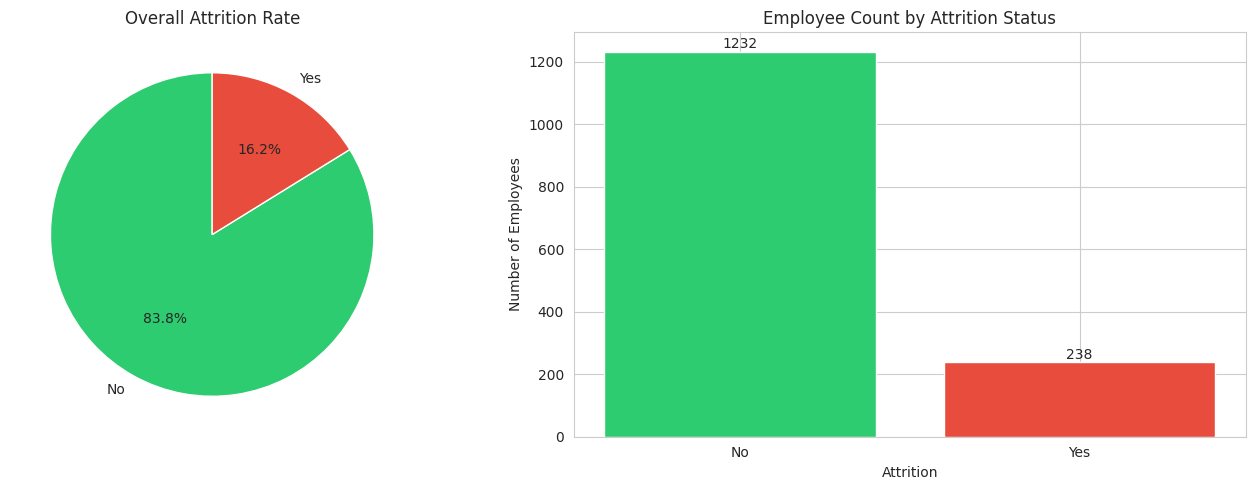

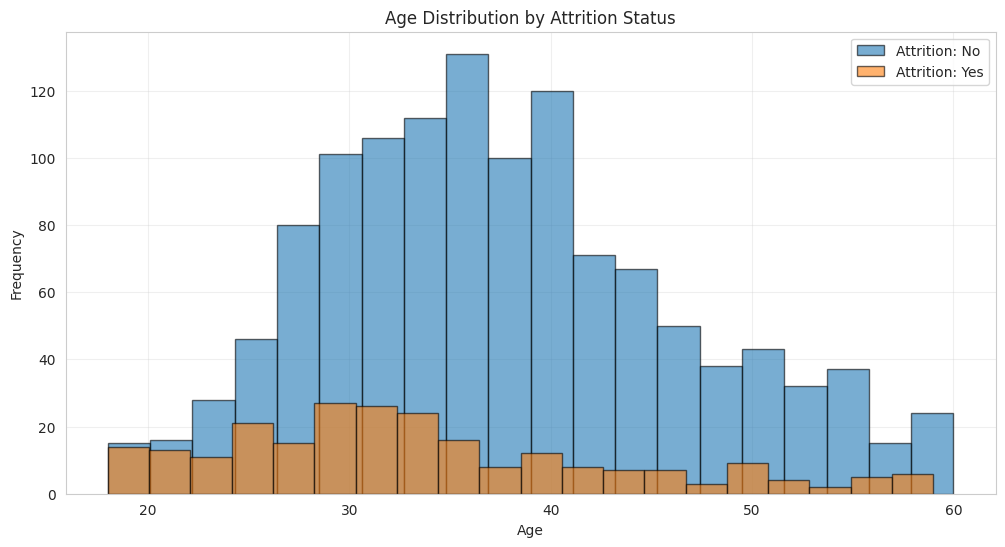

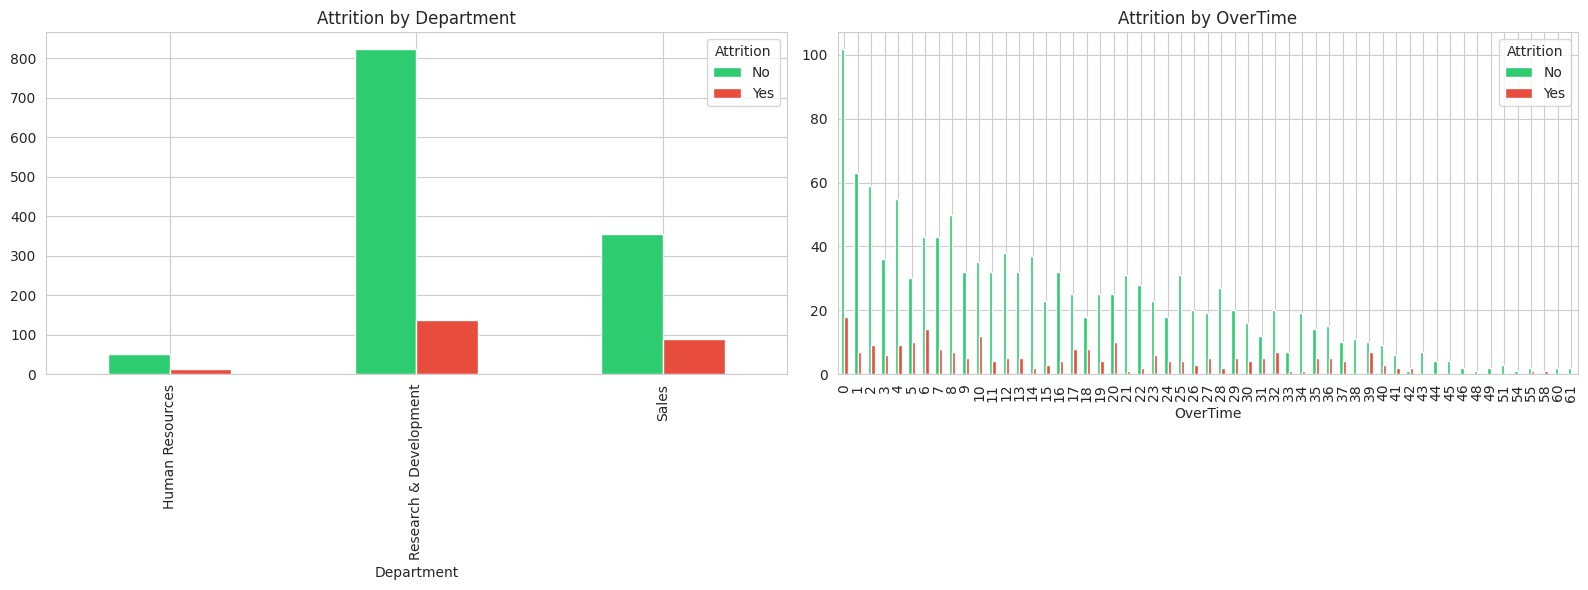

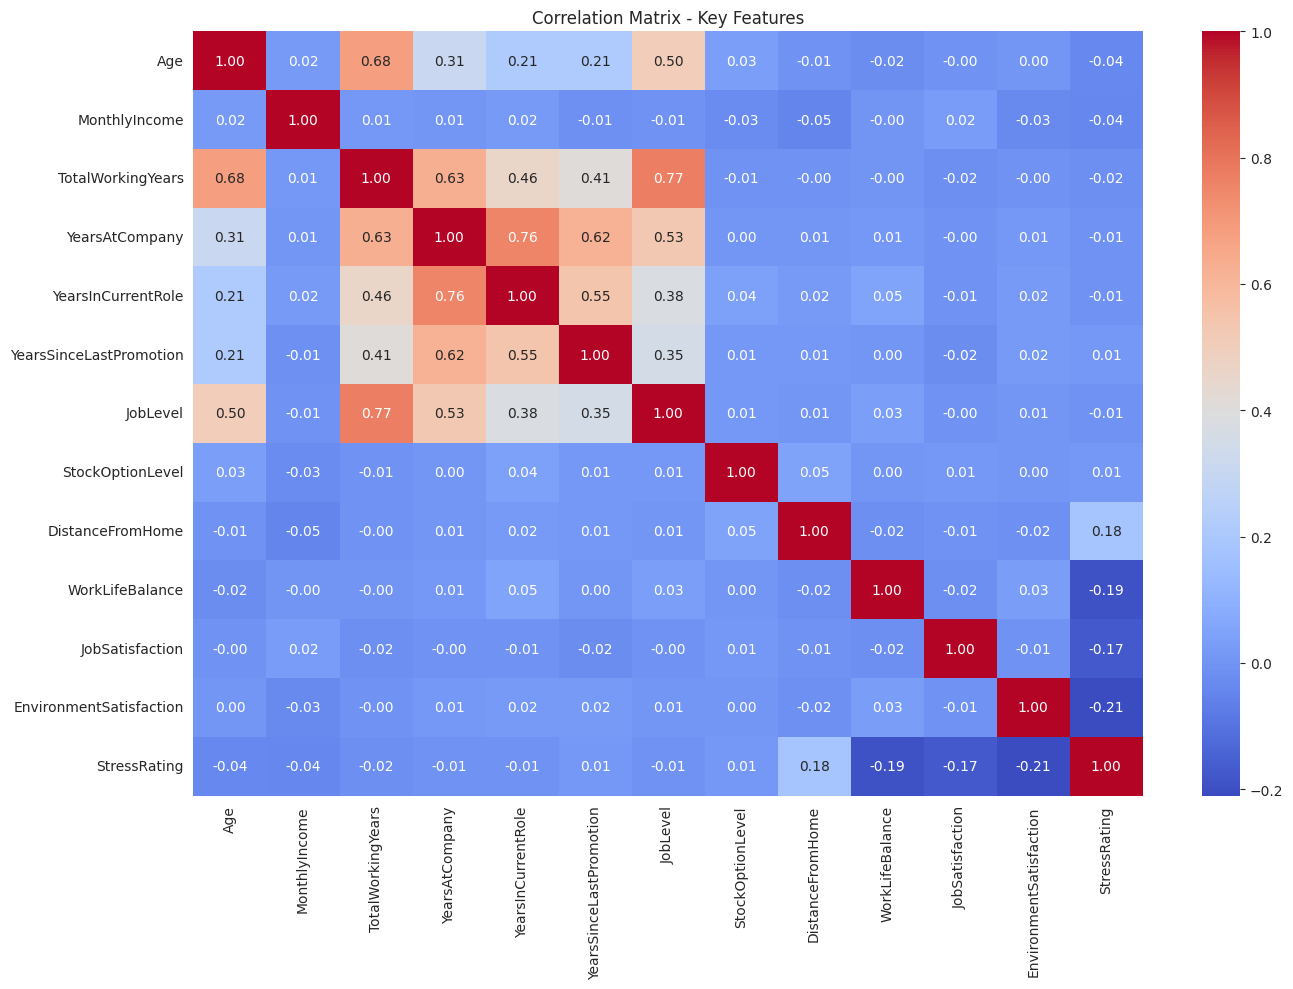

<Figure size 1200x600 with 0 Axes>

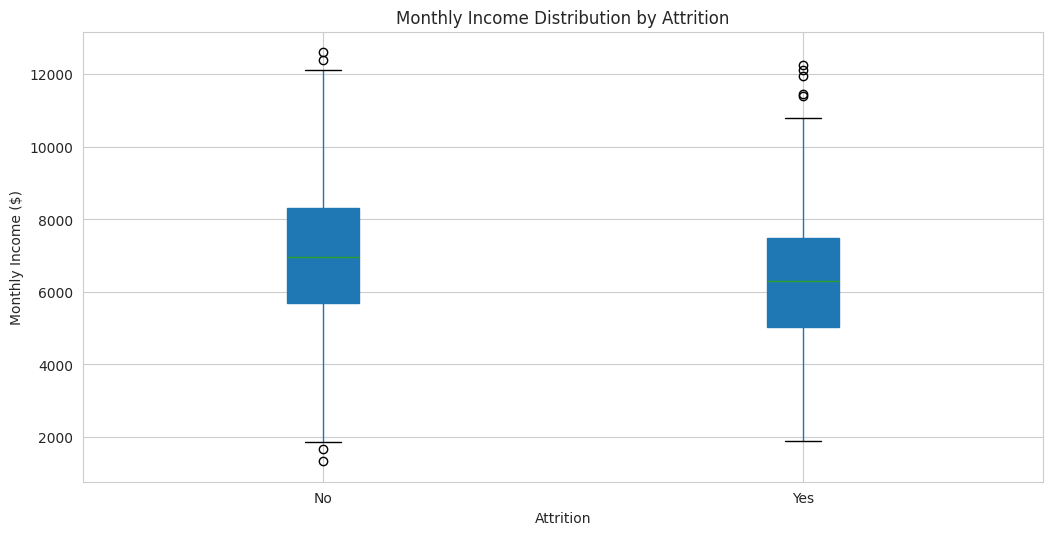

In [7]:
# 5. VISUALIZATIONS
# 5.1 Attrition Rate Charts
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
attrition_counts = df['Attrition'].value_counts()
colors = ['#2ecc71', '#e74c3c']

ax[0].pie(attrition_counts.values, labels=attrition_counts.index, autopct='%1.1f%%', startangle=90, colors=colors)
ax[0].set_title('Overall Attrition Rate')

ax[1].bar(attrition_counts.index, attrition_counts.values, color=colors)
ax[1].set_title('Employee Count by Attrition Status')
ax[1].set_ylabel('Number of Employees')
ax[1].set_xlabel('Attrition')
for i, v in enumerate(attrition_counts.values):
    ax[1].text(i, v + 10, str(v), ha='center')

plt.tight_layout()
plt.savefig('attrition_overview.png')
plt.show()

# 5.2 Age Distribution by Attrition
plt.figure(figsize=(12, 6))
for status in ['No','Yes']:
    subset = df[df['Attrition'] == status]['Age']
    plt.hist(subset, bins=20, alpha=0.6, label=f'Attrition: {status}', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution by Attrition Status')
plt.legend()
plt.grid(alpha=0.3)
plt.savefig('age_attrition.png')
plt.show()

# 5.3 Attrition by Department and Overtime
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

dept_attrition = pd.crosstab(df['Department'], df['Attrition'])
dept_attrition.plot(kind='bar', ax=ax[0], color=colors)
ax[0].set_title('Attrition by Department')

overtime_attrition = pd.crosstab(df['OverTime'], df['Attrition'])
overtime_attrition.plot(kind='bar', ax=ax[1], color=colors)
ax[1].set_title('Attrition by OverTime')

plt.tight_layout()
plt.savefig('categorical_attrition.png')
plt.show()

# 5.4 Correlation Matrix
plt.figure(figsize=(14, 10))
correlation_cols = ['Age','MonthlyIncome','TotalWorkingYears','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','JobLevel','StockOptionLevel','DistanceFromHome','WorkLifeBalance','JobSatisfaction','EnvironmentSatisfaction','StressRating']
correlation = df[correlation_cols].corr()
sns.heatmap(correlation, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix - Key Features')
plt.tight_layout()
plt.savefig('correlation_matrix.png')
plt.show()

# 5.5 Monthly Income vs Attrition
plt.figure(figsize=(12, 6))
df.boxplot(column='MonthlyIncome', by='Attrition', patch_artist=True)
plt.suptitle('')
plt.title('Monthly Income Distribution by Attrition')
plt.ylabel('Monthly Income ($)')
plt.savefig('income_attrition.png')
plt.show()

In [8]:
# 6. DATA PREPROCESSING
df_processed = df.copy()

df_processed['Attrition_Binary'] = (df_processed['Attrition'] == 'Yes').astype(int)

cols_to_drop = ['EmployeeCount','EmployeeNumber','Over18','StandardHours','Attrition']
df_processed = df_processed.drop(columns=cols_to_drop, errors='ignore')

label_encoders = {}
categorical_encode = ['BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','OverTime','HowToEmploy','Incentive','RemoteWork']

for col in categorical_encode:
    if col in df_processed.columns:
        le = LabelEncoder()
        df_processed[col + '_Encoded'] = le.fit_transform(df_processed[col].astype(str))
        label_encoders[col] = le

feature_cols = [col for col in df_processed.columns if col.endswith('_Encoded')] + [col for col in numerical_cols if col in df_processed.columns and col != 'EmployeeNumber']


In [9]:
# 7. MACHINE LEARNING MODEL
X = df_processed[feature_cols]
y = df_processed['Attrition_Binary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42, max_depth=10),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42)
}

results = {}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    y_proba = model.predict_proba(X_test_scaled)[:, 1]
    accuracy = accuracy_score(y_test, y_pred)
    auc_score = roc_auc_score(y_test, y_proba)

    results[name] = {
        'accuracy': accuracy,
        'auc': auc_score,
        'model': model,
        'predictions': y_pred,
        'probabilities': y_proba
    }

best_model_name = max(results, key=lambda x: results[x]['auc'])
best_model = results[best_model_name]['model']


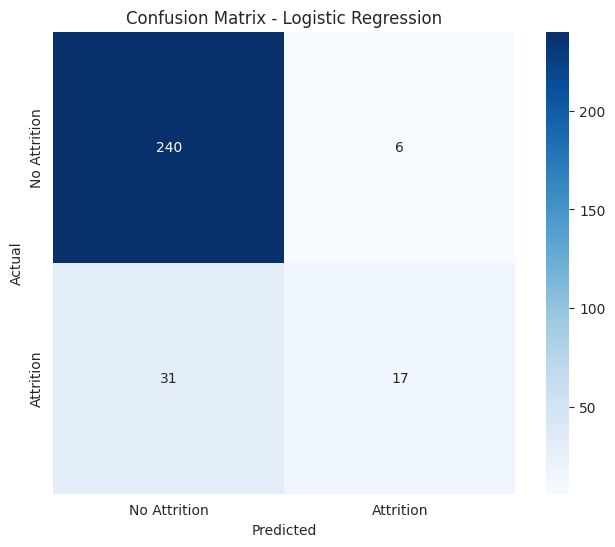

Classification Report:
              precision    recall  f1-score   support

No Attrition       0.89      0.98      0.93       246
   Attrition       0.74      0.35      0.48        48

    accuracy                           0.87       294
   macro avg       0.81      0.66      0.70       294
weighted avg       0.86      0.87      0.86       294



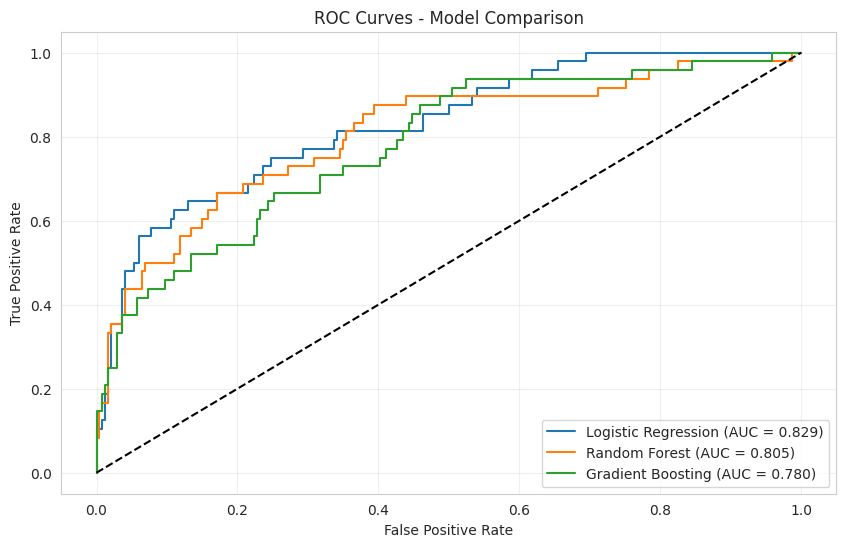

In [10]:
# 8. MODEL EVALUATION
y_pred_best = results[best_model_name]['predictions']

cm = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', square=True, xticklabels=['No Attrition','Attrition'], yticklabels=['No Attrition','Attrition'])
plt.title(f'Confusion Matrix - {best_model_name}')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.savefig('confusion_matrix.png')
plt.show()

print("Classification Report:")
print(classification_report(y_test, y_pred_best, target_names=['No Attrition','Attrition']))

plt.figure(figsize=(10, 6))
for name, result in results.items():
    fpr, tpr, _ = roc_curve(y_test, result['probabilities'])
    plt.plot(fpr, tpr, label=f"{name} (AUC = {result['auc']:.3f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves - Model Comparison')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.savefig('roc_curves.png')
plt.show()

if hasattr(best_model, 'feature_importances_'):
    feature_importance = pd.DataFrame({
        'feature': feature_cols,
        'importance': best_model.feature_importances_
    }).sort_values('importance', ascending=False)

    plt.figure(figsize=(10, 8))
    top_n = 15
    plt.barh(range(top_n), feature_importance.head(top_n)['importance'])
    plt.yticks(range(top_n), feature_importance.head(top_n)['feature'])
    plt.xlabel('Importance Score')
    plt.title(f'Top {top_n} Feature Importance - {best_model_name}')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.savefig('feature_importance.png')
    plt.show()

    print("Top 10 Most Important Features:")
    print(feature_importance.head(10))

In [11]:
# 9. BUSINESS INSIGHTS
total_employees = len(df)
current_attrition = (df['Attrition'] == 'Yes').sum()
attrition_rate = (current_attrition / total_employees) * 100

avg_salary = df['MonthlyIncome'].mean() * 12
cost_per_turnover = avg_salary * 1.5
current_turnover_cost = cost_per_turnover * current_attrition

print("KEY BUSINESS METRICS")
print(f"Total Employees: {total_employees}")
print(f"Current Attrition Cases: {current_attrition}")
print(f"Attrition Rate: {attrition_rate:.2f}%")
print(f"Average Annual Salary: ${avg_salary:,.0f}")
print(f"Cost per Turnover: ${cost_per_turnover:,.0f}")
print(f"Current Annual Turnover Cost: ${current_turnover_cost:,.0f}")

print("MODEL PERFORMANCE")
print(f"Best Model: {best_model_name}")
print(f"Accuracy: {results[best_model_name]['accuracy']:.1%}")
print(f"AUC Score: {results[best_model_name]['auc']:.3f}")

print("BUSINESS RECOMMENDATIONS")
print("1. Deploy the prediction model and monitor high-risk employees.")
print("2. Improve compensation and reduce overtime load.")
print("3. Implement flexible work arrangements.")
print("4. Enhance training, engagement, and leadership development.")

print("Expected Impact")
print(f"Employees Retained: {int(current_attrition * 0.20)}")
print(f"Annual Cost Savings: ${current_turnover_cost * 0.20:,.0f}")

print("Analysis Complete.")
print("Generated Files:")
print("attrition_overview.png")
print("age_attrition.png")
print("categorical_attrition.png")
print("correlation_matrix.png")
print("income_attrition.png")
print("confusion_matrix.png")
print("roc_curves.png")
print("feature_importance.png")

KEY BUSINESS METRICS
Total Employees: 1470
Current Attrition Cases: 238
Attrition Rate: 16.19%
Average Annual Salary: $83,067
Cost per Turnover: $124,601
Current Annual Turnover Cost: $29,654,950
MODEL PERFORMANCE
Best Model: Logistic Regression
Accuracy: 87.4%
AUC Score: 0.829
BUSINESS RECOMMENDATIONS
1. Deploy the prediction model and monitor high-risk employees.
2. Improve compensation and reduce overtime load.
3. Implement flexible work arrangements.
4. Enhance training, engagement, and leadership development.
Expected Impact
Employees Retained: 47
Annual Cost Savings: $5,930,990
Analysis Complete.
Generated Files:
attrition_overview.png
age_attrition.png
categorical_attrition.png
correlation_matrix.png
income_attrition.png
confusion_matrix.png
roc_curves.png
feature_importance.png
